It was August and it was so hot! Ivan was looking through his window, desperately thinking about drinking 2 cold beers at once. But why was he still at his desk? As a matter of fact, why he had a desk in the first place?

"It will be easier to work on this problem if I have a desk" one day he thought. Then he told his son to bring one back from school. His son did that and got expelled. Ivan was very proud of his boy. He followed his footsteps so closely!

What was Ivan thinking about? He was planning his yearly vacation with his wife Maria. Everything was going to be wonderful. They would visit all the amazing pubs at the beach, stay away from sports (and movement in general) as much as possible as they always do. Ivan even bought new sunglasses so he can enjoy watching the young "birds" at the beach even more.

But one thing kept him from snoring at night. He had to choose the dates for the vacation. And today was the day he had to choose them. A low-cost carrier had a big promotion for plane tickets today. The promotion was for only 4 preselected dates. 24, 25, 26 and 27 days from today.

This was all good, yet Ivan wanted to have some 1 minute (yeah, after the song) "whoopsy whoopsy" action with his wife at the night they arrive. Like every modern man, he was aware that the length of a female menstrual cycle is about 28 days (which can vary depending on the individual [Some info here](http://www.womenshealth.gov/publications/our-publications/fact-sheet/menstruation.html)) and his wife just completed her T.O.M (Time of Month). So her new cycle just began (this is an oversimplification).

Furthermore, Ivan politely asked his wife to give him her historical data of recent T.O.Ms. His exact words were: "Ма, дай ми Иксела, ма!". Which really can't be translated (one of those super powers to know a foreign language). As every caring and loving wife, she gave him and Excel spreadsheet he had to mingle and process in order to extract useful information.

Ivan put on a white coat, took a pencil, goggles, hugged a microscope (like every self-respecting scientist that he saw on TV) and opened the file on his brand new laptop. At first, everything went smoothly. He watched his favorite football team lose another paid match (of which he made 100 bucks because every sucker knew the match was sold). Then he looked at the file and remembered that Maria told him that the duration of her last cycle was 27 days.

Thus, his analysis began (Of course he paid a local student to do it for him. The payment was equal to something like a cup of tea but Ivan promised the student an internship in his prestigious software company "БитакСофт"):

# Methodology

The dataset used below is provided by a healthy (mid 20s) female. Each datapoint (row) marks the beginning of a new cycle.

It contains data for about 3 and a half years, collected using a mobile app. The data is provided as is. 

# Required packages

You will need the following packages (along with their respective versions) to follow along. All of them are installable using ```pip install ...```

In [1]:
%load_ext watermark

In [28]:
%watermark -v -p numpy,seaborn,matplotlib,pandas

CPython 3.5.1
IPython 5.0.0

numpy 1.11.1
seaborn 0.7.1
matplotlib 1.5.1
pandas 0.18.1


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from pylab import rcParams
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='ticks', palette='Spectral', font_scale=1.5)

material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)
rcParams['figure.figsize'] = 16, 8

plt.xkcd();
random_state = 42
np.random.seed(random_state);

In [4]:
df = pd.read_csv('data/periods.csv', parse_dates=['period_start'])

In [5]:
durations = (df['period_start'] - df['period_start'].shift(-1)).dt.days

In [6]:
durations = durations.apply(np.abs).dropna().apply(np.int).values

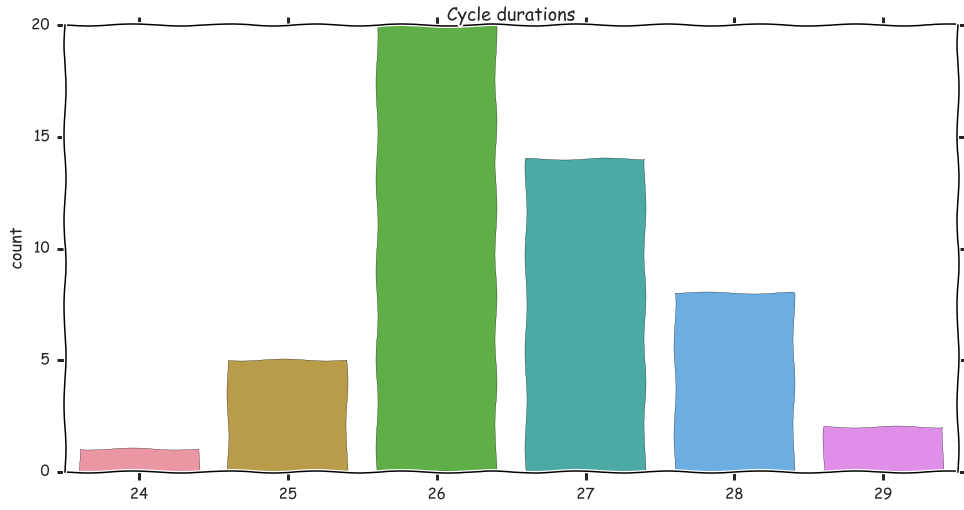

In [43]:
g = sns.countplot(durations);
g.set_title("Cycle durations");

In [40]:
def bootstrap(data, n=1000):
    return [np.random.choice(data, size=len(data), replace=True) for s in range(n)]

def plot_bootstrap(samples, title=""):
    unique, counts = np.unique(samples, return_counts=True)
    g = sns.barplot(unique, counts);
    if title:
        g.set_title(title)

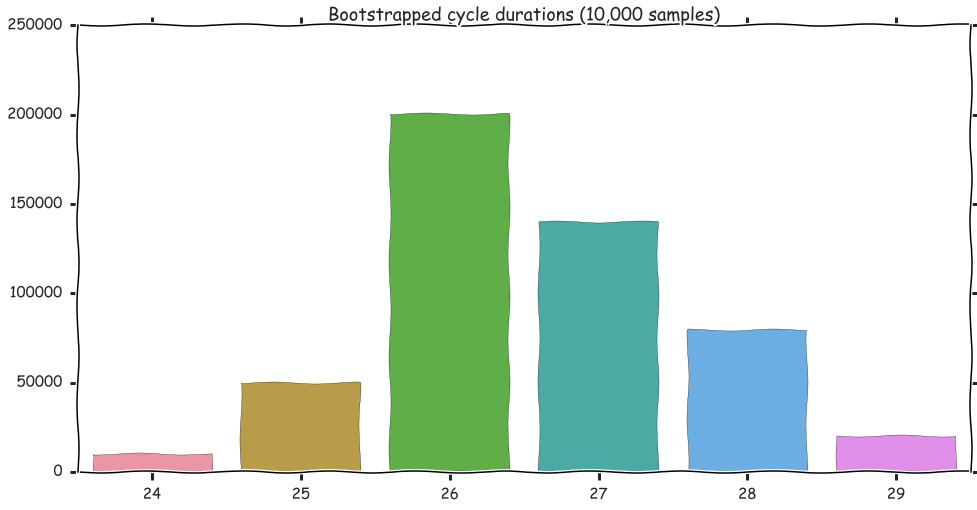

In [44]:
n = 10000
samples = bootstrap(durations, n)
plot_bootstrap(samples, "Bootstrapped cycle durations (10,000 samples)")

### What is the probability of observing duration of 24 days?

In [25]:
unique, counts = np.unique(samples, return_counts=True)
total_datapoints = np.sum(counts)
print(dict(zip(unique, counts)))

{24: 9935, 25: 50179, 26: 199723, 27: 139680, 28: 80487, 29: 19996}


In [11]:
print(np.round(counts[0] / total_datapoints, 3))

0.02


According to our bootstrapped samples about 2 percent. How about 26 days?

In [12]:
print(np.round(counts[2] / total_datapoints, 3))

0.399


Now that is 40% (But of course it is the most likely outcome)! How likely is the cycle to be of length 27 days or more?

In [13]:
print(np.round(np.sum(counts[3:]) / total_datapoints, 3));

0.48


48% likelihood of getting 27, 28 or 29 days. Wasn't that just easy to do? Do you notice that there is no dreadful *p* values lying (see what I did there?) around?

### Given that the duration of the last cycle was 27 days what will be the duration of this one?

We can use Bayes Rule to answer this question. Our prior probabilities are by the data above and we just have to get our likelihood. How? Just count the number of occurences where the cycle is with duration of 27 days for each possible value.

In [14]:
durations

array([29, 26, 26, 26, 28, 26, 27, 26, 27, 27, 28, 26, 26, 27, 26, 28, 25,
       26, 25, 26, 27, 28, 28, 27, 26, 29, 26, 26, 28, 26, 27, 25, 27, 27,
       26, 26, 27, 27, 26, 27, 28, 24, 25, 27, 26, 28, 25, 26, 26, 27])

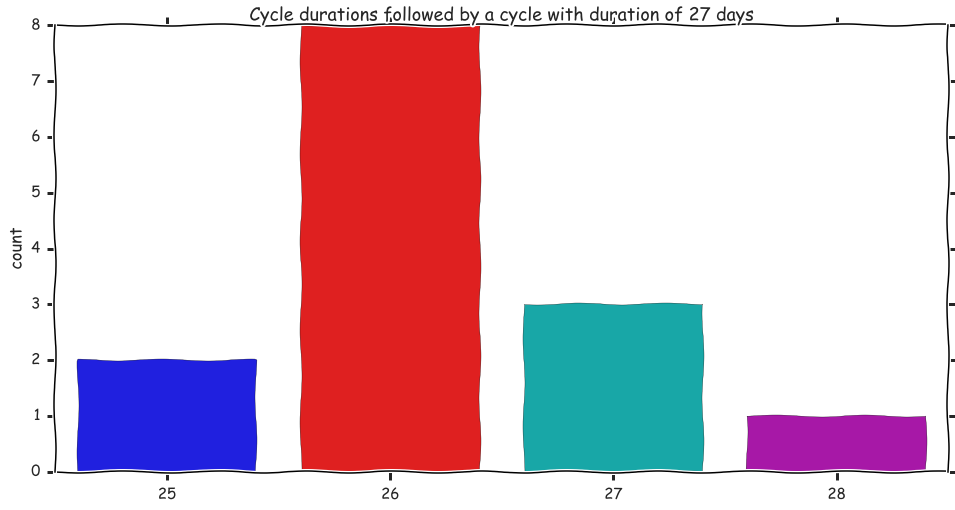

In [49]:
ds = pd.Series(durations)
durations_prev_27 = ds[(ds.shift(-1) == 27)].values
g = sns.countplot(durations_prev_27);
g.set_title("Cycle durations followed by a cycle with duration of 27 days");

What if the duration was 26 days?

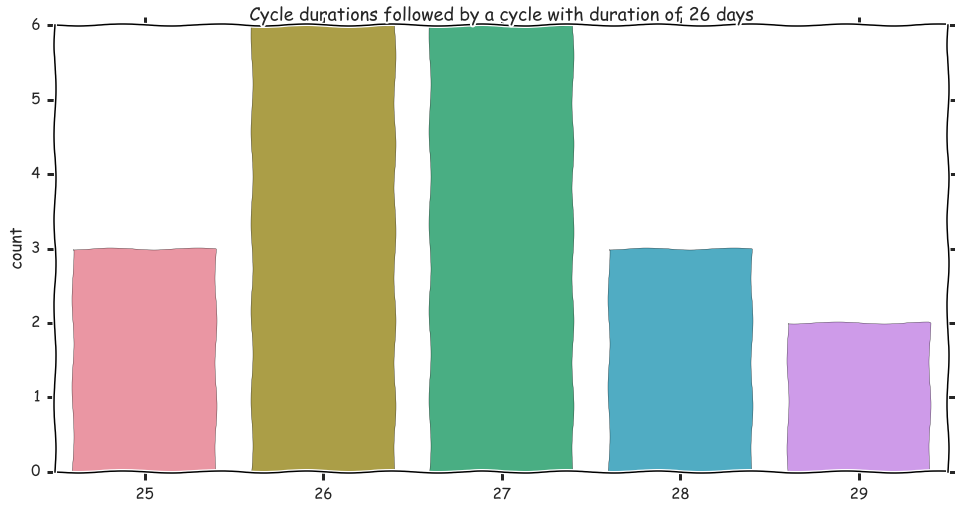

In [50]:
durations_prev_26 = ds[(ds.shift(-1) == 26)].values
g = sns.countplot(durations_prev_26)
g.set_title("Cycle durations followed by a cycle with duration of 26 days");

Hmm, they look a bit different, don't they? But is this difference significant?

We are going to try to answer this question using shuffling. We are interested in simulating the distribution of mean differences between the two groups. This will be done via shuffling the labels (which map a value to it's group) effectively trying to answer the question: does the labels matter?  

In [27]:
g1 = durations_prev_26
g2 = durations_prev_27

def shuffle(g1, g2):
    pool = np.hstack(np.array([g1, g2]))
    np.random.shuffle(pool)
    return np.split(pool, [len(g1)])

def mean_diff(g1, g2):
    return np.abs(np.mean(g1) - np.mean(g2))

def shuffle_labels(g1, g2, num_shuffles):
    count = 0
    for _ in range(num_shuffles):
        new_samples = shuffle(g1, g2)
        mean_diff_val = mean_diff(new_samples[0], new_samples[1])
        if mean_diff_val >= observed_mean_diff:
            count += 1
    return count

observed_mean_diff = mean_diff(g1, g2)
print("Observed mean difference is", observed_mean_diff)

num_shuffles = 10000
count = shuffle_labels(g1, g2, num_shuffles)
print("Probability of getting the observed mean difference by chance is", count / float(num_shuffles))

Observed mean difference is 0.535714285714
Probability of getting the observed mean difference by chance is 0.1956


That is the probability of getting the observed mean difference by chance is 20%. So one might conclude that this difference is a bit iffy.

#### Back to the matter at hand. What if the last period was with duration 27 days?

We are interested in the following probability:

$$\tag{1} P(\theta\,|\,\text{last cycle was 27 days}) = P(\text{last cycle was 27 days}\,|\,\theta) \, P(\theta)$$

for each $\theta$ where $\theta$ can be one of the following values: 24, 25, 26 or 27.

Let bootstrap some samples from our dataset with previous cycle duration of 27 days and use that as a likelihood. We will use the bootstrapped samples from the whole dataset as prior distribution.

In [56]:
boot_prev_27 = bootstrap(durations_prev_27, n)
likelihood = dict(zip(*np.unique(boot_prev_27, return_counts=True)))
prior = dict(zip(*np.unique(samples, return_counts=True)))

Now just multiply our prior and likelihood and use 1 where no likelihood is defined (there might be better ways to handle this) to obtain the posterior.

In [61]:
post = dict()
for k, v in prior.items():
    if k in likelihood:
        post[k] = likelihood[k] * v
    else:
        post[k] = 1

Now let's normalize it so that is sums to 1.

In [62]:
norm = sum(post.values())
for k, v in post.items():
    post[k] = v / norm

In [63]:
post

{24: 4.5471874848057154e-11,
 25: 0.045896617399841015,
 26: 0.72812481226794368,
 27: 0.1898902524341439,
 28: 0.036088317807127637,
 29: 4.5471874848057154e-11}

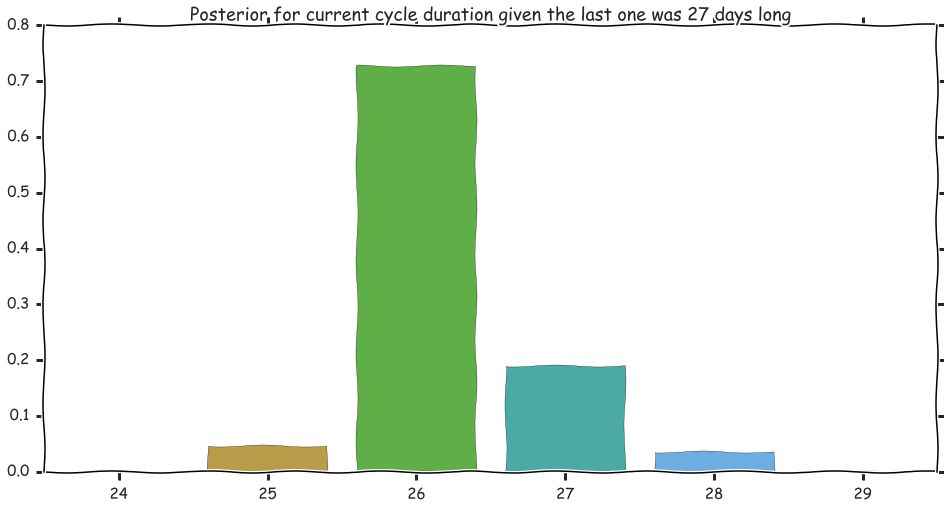

In [64]:
g = sns.barplot(list(post.keys()), list(post.values()));
g.set_title("Posterior for current cycle duration given the last one was 27 days long");

Given this information, Ivan thought - "the bigger the better". He bought tickets for 26 days from today and went to bed with a smile on his face. 

To his surprise (and hopefully not yours) Maria's cycle started just as they as their vacation began. They still had a great time, though. And the student who did the analysis was returned to his home country due to "missing or incomplete grandmother birth certificate". Which of course deserve a blog post on his own.